In [23]:
import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib notebook

In [96]:
tStep=3000
height=np.zeros(int(tStep/2))

center=3.0
bandWidth=0.05

fName="Source_waveSurf/waveSurf_1225_1607_data.dat"
readFile=open(fName,"r")
spaceCount=0
indexCount=0
stepCount=0
ymax=0

for line in readFile:
    if line=='\n':
        spaceCount+=1 
        #print("%d %d"%(spaceCount, indexCount))
        if(indexCount%2!=0 and spaceCount==1):
            height[stepCount]=ymax
            stepCount+=1
            ymax=0
    if (line!='\n' and (indexCount%2)!=0):
        splitted=line.split()
        px=splitted[1]
        py=splitted[2]
        px=float(px)
        py=float(py)
        if(center-bandWidth < px and px < center+bandWidth):
            if(py>ymax):
                ymax=py
    if spaceCount==2:
        indexCount+=1
        spaceCount=0
    if indexCount>tStep:
        break
    if not line:
        print(stepCount)
        break



readFile.close()
print("end")

end


In [93]:
print(stepCount)

1501


In [108]:
time=np.arange(0, stepCount*0.01, 0.01)
print(time.size)
print(height.size)

1500
1500


<IPython.core.display.Javascript object>


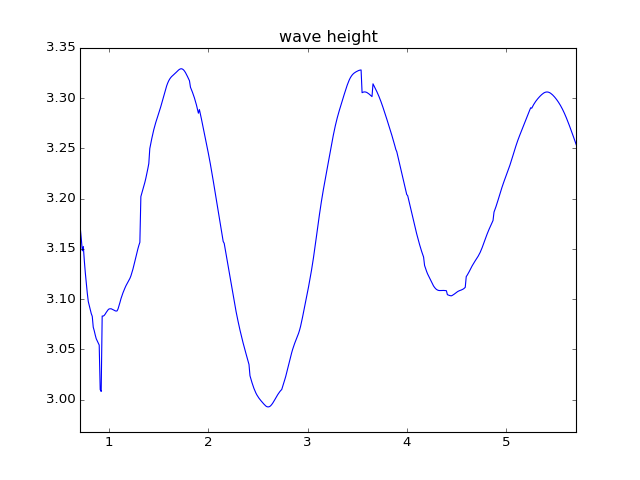

In [109]:

plt.title("wave height")
plt.plot(time, height)